# Đề tài: Phân tích và dự đoán mưa ở Úc
## Nhóm 10
+ Hoàng Mạnh Đức - 21133027 
+ Phạm Hữu Dũng - 21133022
+ Trương Quốc Việt - 211333092
+ Lê Lương Trường An - 21133001
+ Nguyễn Phương Khoa - 21133048

# KIỂM TRA VÀ ĐÁNH GIÁ SƠ BỘ VỀ DỮ LIỆU (EDA).
## Kiểm tra dữ liệu

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings

df = pd.read_csv('weatherAUS.csv')
print('Size of weather data frame is :',df.shape)
print(df)

Size of weather data frame is : (145460, 24)
              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            Na

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RISK_MM           3267
RainTomorrow      3267
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [5]:
# Kiểm tra các ký tự đặc biệt trong cột kiểu object
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    special_characters = df[col].str.contains(r'[^\w\s]', na=False)
    if special_characters.any():
        print(f"Column '{col}' contains special characters:")
        print(df[col][special_characters])

Column 'Date' contains special characters:
0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
145459    2017-06-25
Name: Date, Length: 145460, dtype: object


In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
# Chúng tôi thấy có một số cột có giá trị null.
# Trước khi bắt đầu tiền xử lý, hãy tìm hiểu cột nào có giá trị null tối đa
df.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RISK_MM          142193
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

## Phân tích sơ bộ 

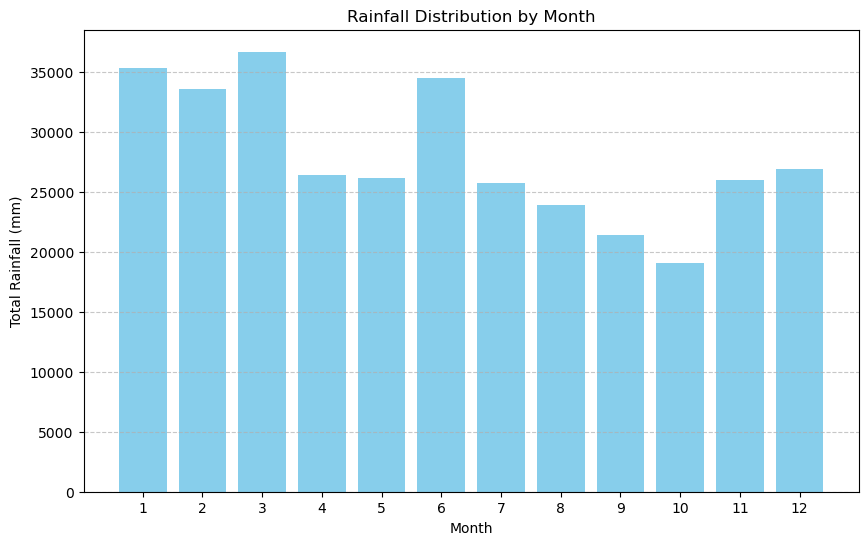

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển cột 'Date' sang kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

# Tạo cột mới 'Month' để lấy thông tin về tháng từ cột 'Date'
df['Month'] = df['Date'].dt.month

# Nhóm dữ liệu theo tháng và tính tổng lượng mưa cho mỗi tháng
rainfall_by_month = df.groupby('Month')['Rainfall'].sum()

# Vẽ biểu đồ histogram cho phân phối lượng mưa trong mỗi tháng
plt.figure(figsize=(10, 6))
plt.bar(rainfall_by_month.index, rainfall_by_month.values, color='skyblue')
plt.title('Rainfall Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


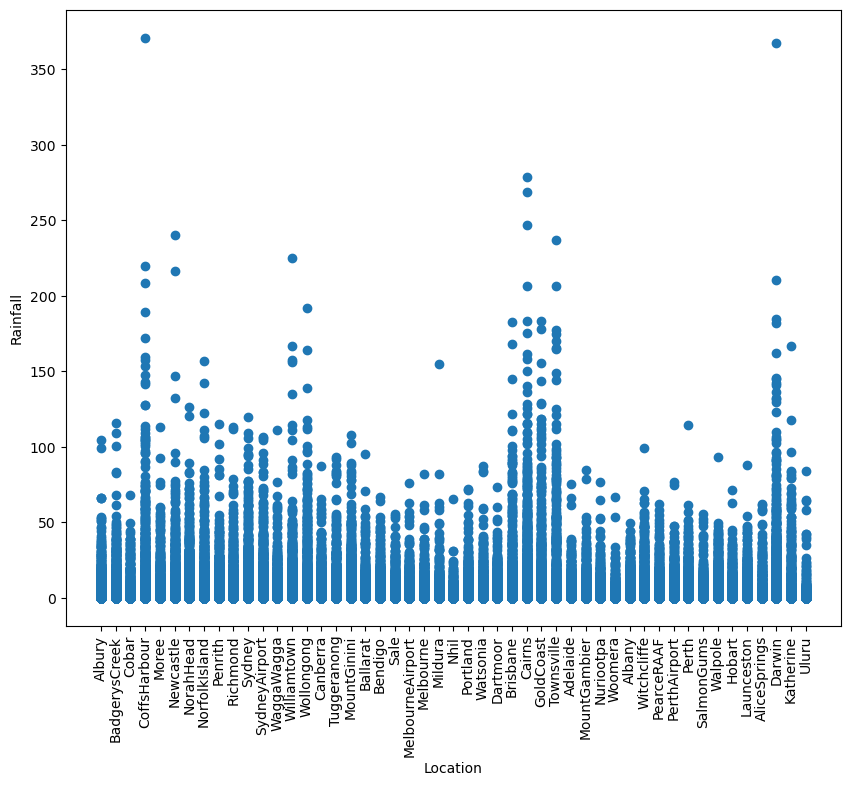

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(df['Location'],df['Rainfall'])
plt.xlabel("Location")
plt.xticks(rotation=90)
plt.ylabel("Rainfall")
plt.show()

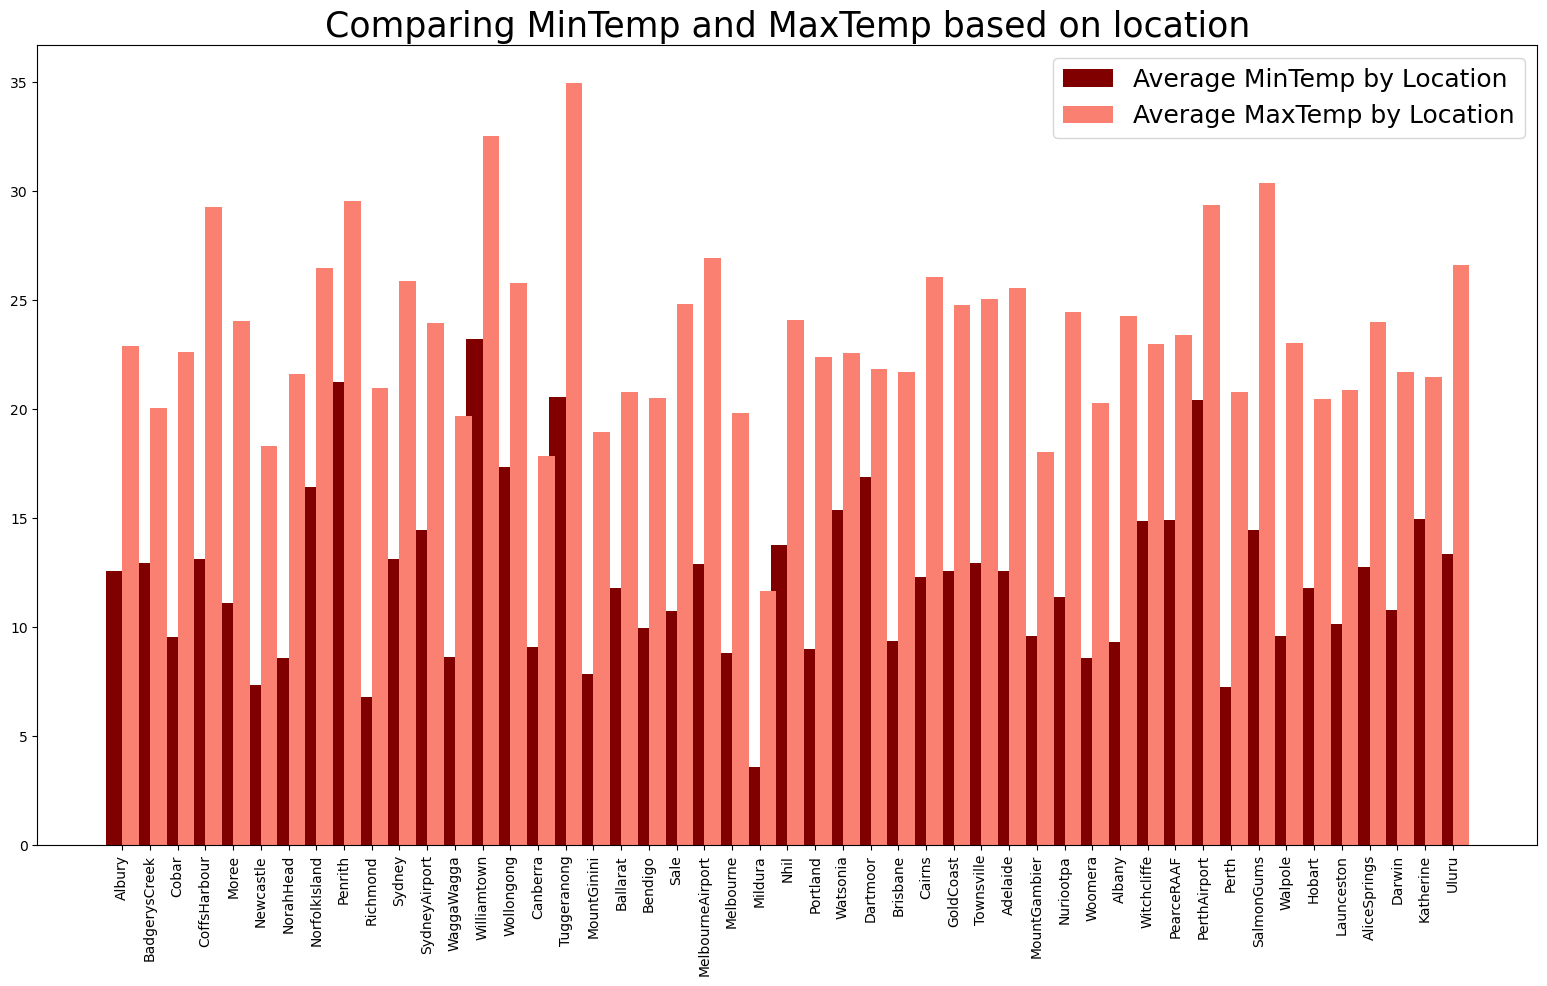

In [10]:
a = df.groupby('Location').agg({'MinTemp':'mean'})
c = df.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (15,8)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
w = 0.6

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', color='maroon', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', color='salmon', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)
plt.title("Comparing MinTemp and MaxTemp based on location", fontsize=25)
plt.legend(fontsize=18)

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,12


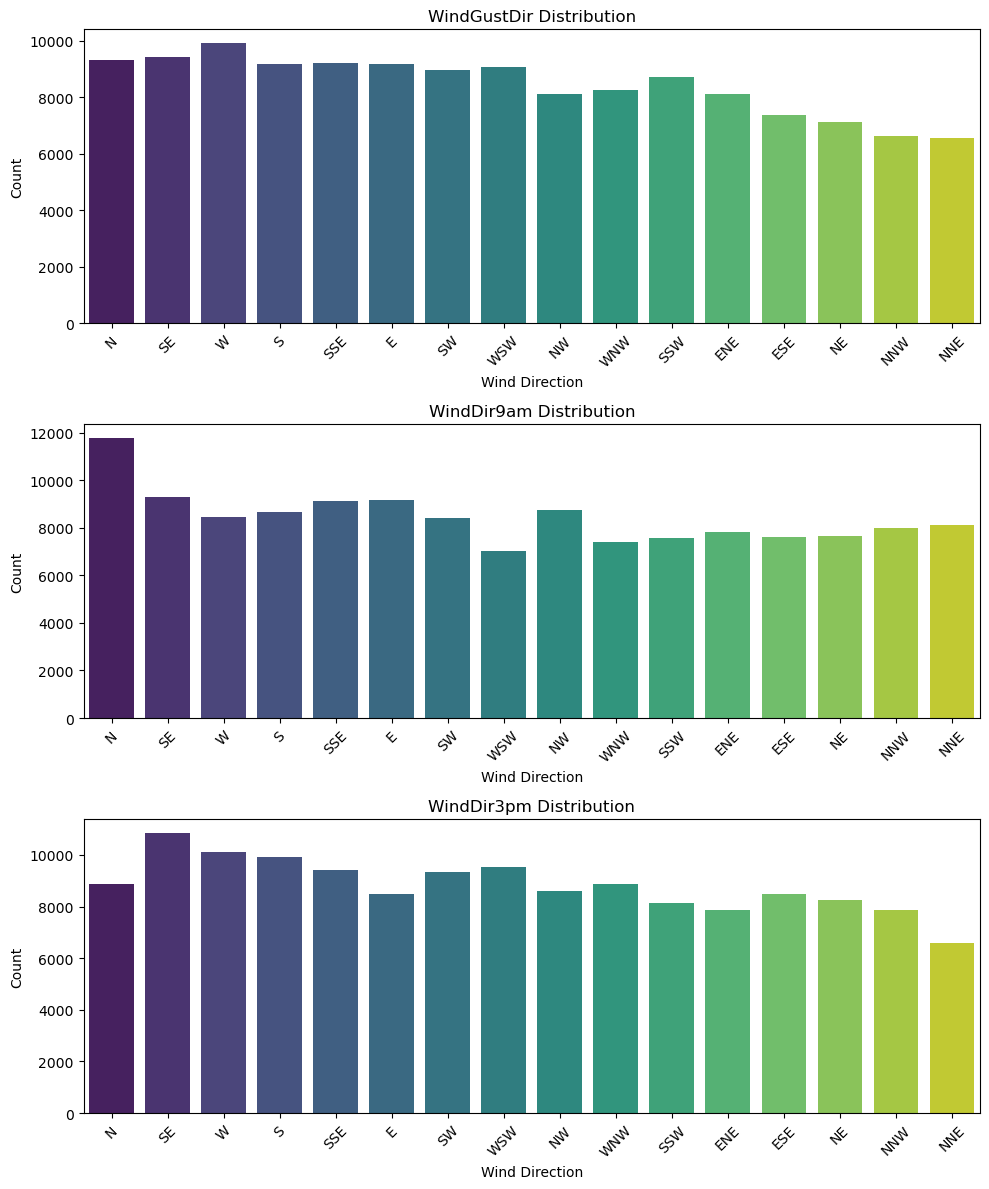

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đếm số lượng các loại hướng gió cho WindGustDir, WindDir9am, WindDir3pm
wind_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
wind_directions = df[wind_columns].melt()['value'].value_counts()

# Vẽ biểu đồ countplot cho các hướng gió
fig, ax = plt.subplots(len(wind_columns), 1, figsize=(10, 12))

for i, wind_column in enumerate(wind_columns):
    sns.countplot(data=df, x=wind_column, palette='viridis', order=wind_directions.index, ax=ax[i])
    ax[i].set_title(f"{wind_column} Distribution", fontsize=12)
    ax[i].set_xlabel("Wind Direction", fontsize=10)
    ax[i].set_ylabel("Count", fontsize=10)
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_7316\337638028.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['WindSpeed9am'], ax=ax[0,0], color='green')
C:\Users\MSI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MSI\AppData\Local\Temp\ipykernel_7316\337638028.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function w

Text(0.5, 1.0, 'Temperature at 3PM')

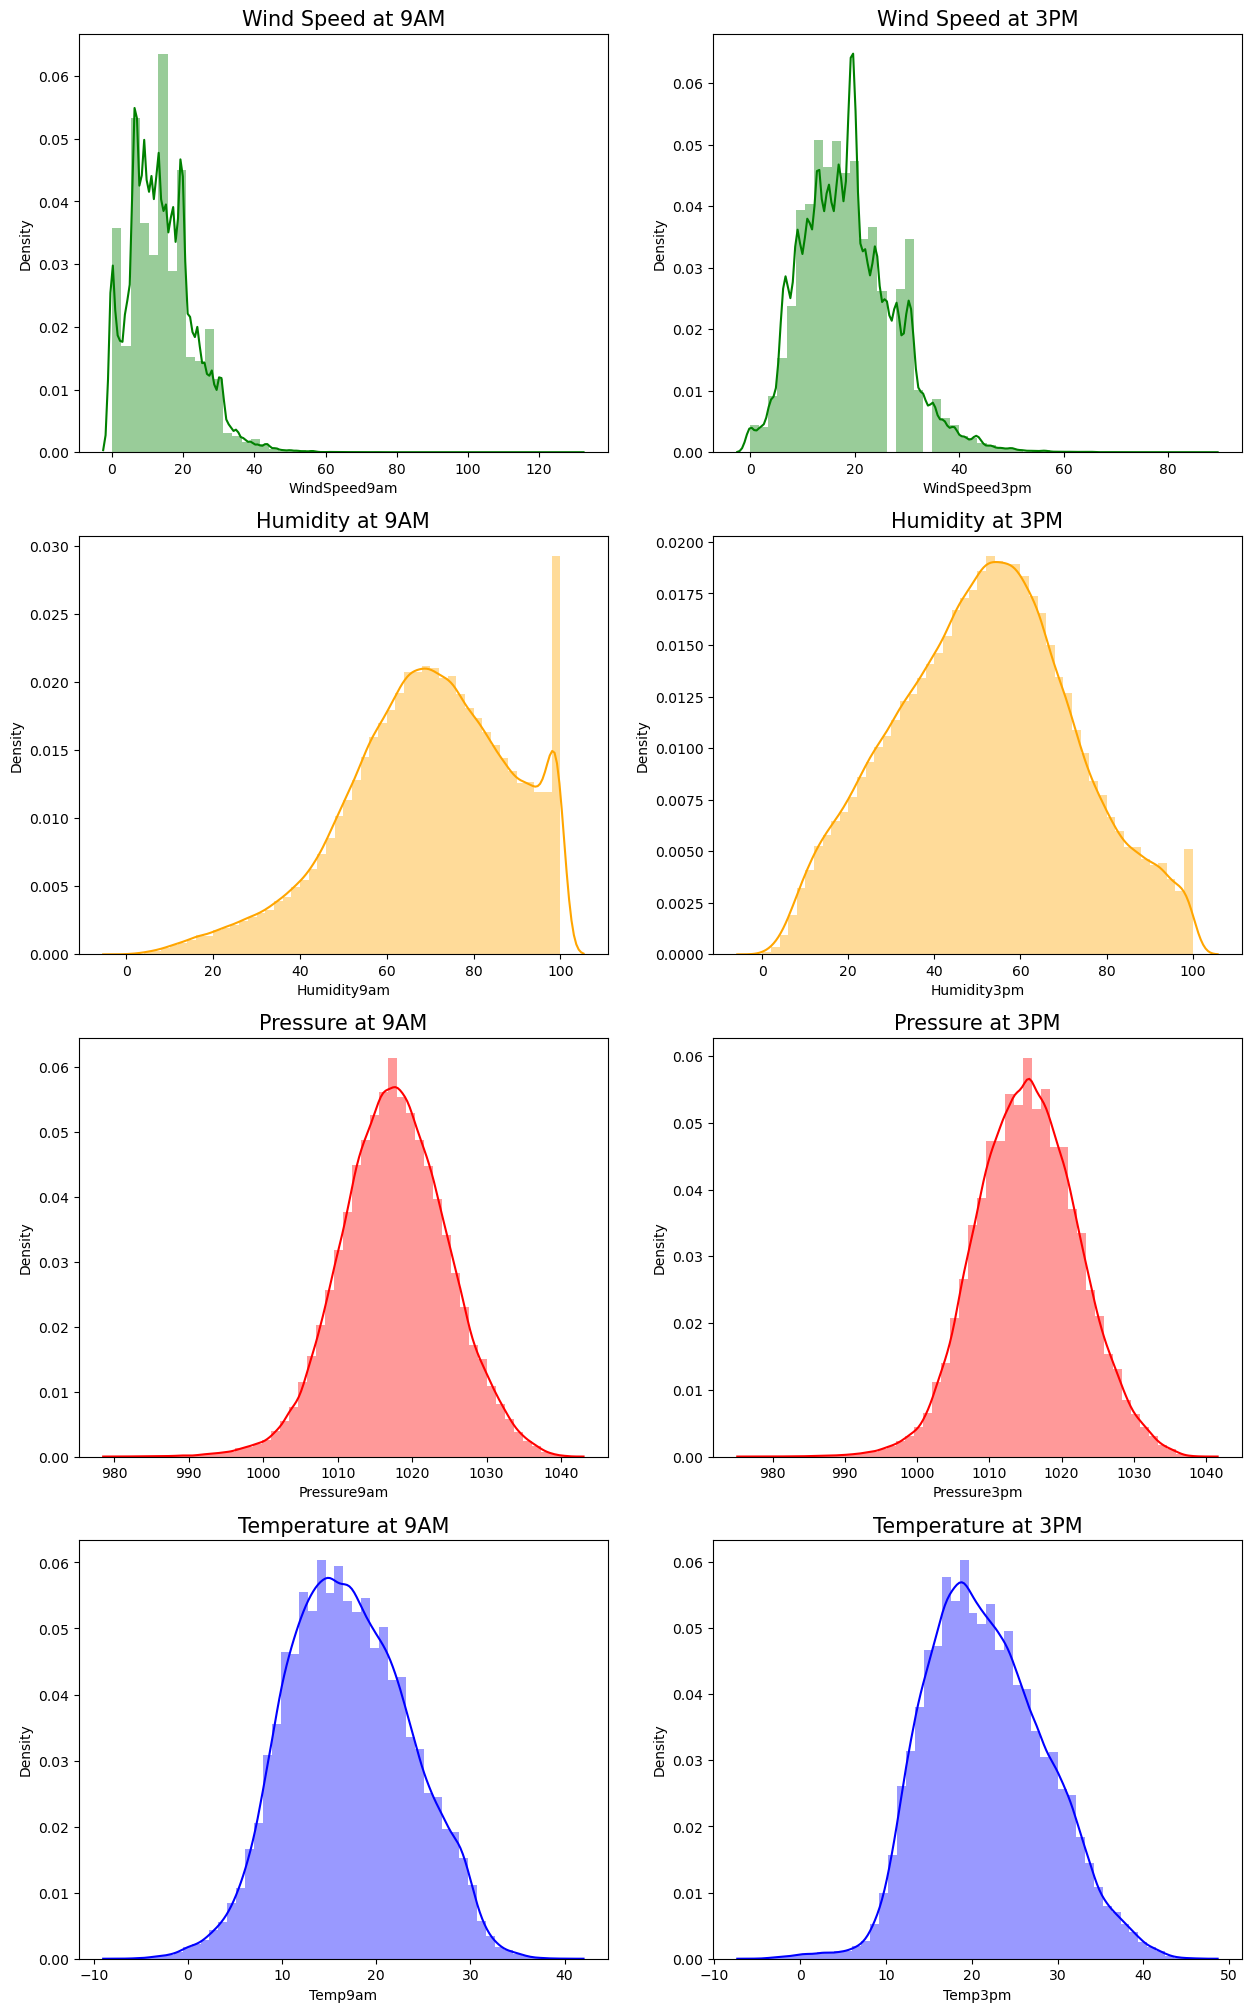

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(15,25))

# WindSpeed9am
sns.distplot(df['WindSpeed9am'], ax=ax[0,0], color='green')
ax[0,0].set_title("Wind Speed at 9AM", fontsize=15)

# WindSpeed3pm
sns.distplot(df['WindSpeed3pm'], ax=ax[0,1], color='green')
ax[0,1].set_title("Wind Speed at 3PM", fontsize=15)

# Humidity9am
sns.distplot(df['Humidity9am'], ax=ax[1,0], color='orange')
ax[1,0].set_title("Humidity at 9AM", fontsize=15)

# Humidity3pm
sns.distplot(df['Humidity3pm'], ax=ax[1,1], color='orange')
ax[1,1].set_title("Humidity at 3PM", fontsize=15)

# Pressure9am
sns.distplot(df['Pressure9am'], ax=ax[2,0], color='red')
ax[2,0].set_title("Pressure at 9AM", fontsize=15)

# Pressure3pm
sns.distplot(df['Pressure3pm'], ax=ax[2,1], color='red')
ax[2,1].set_title("Pressure at 3PM", fontsize=15)

# Temp9am
sns.distplot(df['Temp9am'], ax=ax[3,0], color='blue')
ax[3,0].set_title("Temperature at 9AM", fontsize=15)

# Temp3pm
sns.distplot(df['Temp3pm'], ax=ax[3,1], color='blue')
ax[3,1].set_title("Temperature at 3PM", fontsize=15)

## Tiền xử lý dữ liệu

In [14]:
# Như chúng ta có thể thấy bốn cột đầu tiên có ít hơn 60% dữ liệu, chúng ta có thể bỏ qua bốn cột này
# Chúng ta không cần cột vị trí và ngày tháng vì chúng ta sẽ tìm hiểu xem trời có mưa ở Úc không (không nêu địa điểm cụ thể)
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Date','Location'],axis=1)
df.shape

(145460, 19)

In [15]:
#loại bỏ tất cả các giá trị null trong df
df = df.dropna(how='any')
df.shape

(112925, 19)

In [16]:
#loại bỏ các ngoại lệ trong dữ liệu - sử dụng điểm Z để phát hiện và loại bỏ các ngoại lệ.
from scipy import stats
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df= df[(z < 3).all(axis=1)]
print(df.shape)

         MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.117567  0.108221  0.206661       0.241214      0.577742   
1       0.841802  0.206845  0.276405       0.241214      1.339742   
2       0.037620  0.292772  0.276405       0.391345      0.457900   
3       0.553991  0.622159  0.276405       1.260094      0.500842   
4       0.773137  1.237969  0.160165       0.016018      0.980214   
...          ...       ...       ...            ...           ...   
145454  1.465392  0.265754  0.276405       0.734636      0.021471   
145455  1.577319  0.036615  0.276405       0.734636      0.261157   
145456  1.449403  0.235487  0.276405       1.410225      0.261157   
145457  1.161592  0.464626  0.276405       0.284243      0.740528   
145458  0.777844  0.478947  0.276405       0.959832      0.261157   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.524408     0.190140     1.380413     1.382962     1.142455   
1           0.29131

In [17]:
#giải quyết các vấn đề phân loại 
# chỉ cần thay đổi yes/no thành 1/0 cho RainToday và RainTomorrow

df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
#Xem các giá trị duy nhất và chuyển đổi chúng thành int bằng pd.get_Dummies()

categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))
# chuyển đổi các cột phân loại
df = pd.get_dummies(df, columns=categorical_columns)
df.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,False,False,False,False,False,False,False,False,False,False
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,False,False,False,False,False,False,False,True,False,False
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,False,False,False,False,False,False,True,False,False,False
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,False,False,False,False,True,False,False,False,False,False
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,False,False,False,True,False,False,False,False,False,False


In [18]:
#bước tiếp theo là chuẩn hóa dữ liệu - sử dụng MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.550802,0.632099,0.007143,0.671233,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.542781,0.516049,0.000000,0.589041,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.366310,0.558025,0.000000,0.383562,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.419786,0.686420,0.000000,1.000000,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.510695,0.641975,0.050000,0.287671,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df.isnull().sum() #Xem giá trị null còn lại trong tập dữ liệu

MinTemp           0
MaxTemp           0
Rainfall          0
WindGustSpeed     0
WindSpeed9am      0
                 ..
WindDir9am_SSW    0
WindDir9am_SW     0
WindDir9am_W      0
WindDir9am_WNW    0
WindDir9am_WSW    0
Length: 64, dtype: int64

**Feature Selection**

In [20]:
#cùng xem đâu là những tính năng quan trọng của RainTomorrow!
#Sử dụng SelectKBest để có được những tính năng hàng đầu!
from sklearn.feature_selection import SelectKBest, chi2
X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 3 columns

Index(['Rainfall', 'RainToday', 'RISK_MM'], dtype='object')


In [22]:
# Trích xuất các cột dữ liệu liên quan từ DataFrame ban đầu
df1 = df[['Humidity3pm','Rainfall','RainToday','RainTomorrow']]
X = df1[['Humidity3pm']] # Gán cột 'Humidity3pm' cho biến X để sử dụng làm dữ liệu đầu vào (features) cho mô hình
y = df1[['RainTomorrow']] # Gán cột 'RainTomorrow' cho biến y để sử dụng làm dữ liệu đích (target) cho mô hình

# MÔ HÌNH PHÂN TÍCH VÀ KẾT QUẢ

All models give an accuracy score of ~ 83-84 % except for SVM.
Considering the computation time,  DecisionTreeClassifier is best.


## LOGISTIC REGRESSION

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Hồi quy logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Khởi tạo bộ phân loại
clf_logreg = LogisticRegression(random_state=0)

# Huấn luyện bộ phân loại
t0 = time.time()
clf_logreg.fit(X_train, y_train)
training_time = time.time() - t0

# Dự đoán trên tập kiểm tra
y_pred = clf_logreg.predict(X_test)

# Tính toán chỉ số precision
precision = precision_score(y_test, y_pred)

# tính recall
recall = recall_score(y_test, y_pred)

# tính F1-score
f1 = f1_score(y_test, y_pred)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)

# Tính độ chính xác cho class 1 (Yes)
precision_yes = precision_score(y_test, y_pred, pos_label=1)

# Tính độ chính xác cho class 0 (No)
precision_no = precision_score(y_test, y_pred, pos_label=0)

#tính toán recall cho từng lớp
recall_yes = recall_score(y_test, y_pred, pos_label=1)
recall_no = recall_score(y_test, y_pred, pos_label=0)
#tính toán f1-score của từng lớp
f1_yes = f1_score(y_test, y_pred, pos_label=1)
f1_no = f1_score(y_test, y_pred, pos_label=1)
print('Accuracy:', accuracy)
print('Precision (Yes/No): {:.2%} / {:.2%}'.format(precision_yes, precision_no))
print('Recall (Yes/No): {:.2%} / {:.2%}'.format(recall_yes, recall_no))
print('F1-score (Yes/No): {:.2%} / {:.2%}'.format(f1_yes, f1_no))
print('Training Time:', training_time)

C:\Users\AnLe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8409364196603036
Precision (Yes/No): 69.88% / 85.46%
Recall (Yes/No): 31.57% / 96.73%
F1-score (Yes/No): 43.49% / 43.49%
Training Time: 0.07479119300842285


## RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Khởi tạo bộ phân loại
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)

#Đào tạo bộ phân loại
t0 = time.time()
clf_rf.fit(X_train, y_train)
training_time = time.time() - t0

# Dự đoán trên tập kiểm tra
y_pred = clf_rf.predict(X_test)

# Tính toán độ chính xác 
accuracy = accuracy_score(y_test, y_pred)

# Tính precision
precision = precision_score(y_test, y_pred)

# Tính recall
recall = recall_score(y_test, y_pred)

# Tính F1-score
f1 = f1_score(y_test, y_pred)

# Tính toán độ chính xác cho class 1 (Yes)
precision_yes = precision_score(y_test, y_pred, pos_label=1)

# Tính toán độ chính xác cho class 0 (No)
precision_no = precision_score(y_test, y_pred, pos_label=0)

#tính toán recall cho từng class 
recall_yes = recall_score(y_test, y_pred, pos_label=1)
recall_no = recall_score(y_test, y_pred, pos_label=0)

# Tính toán F1-score của từng lớp
f1_yes = f1_score(y_test, y_pred, pos_label=1)
f1_no = f1_score(y_test, y_pred, pos_label=1)

print('Accuracy:', accuracy)
print('Precision (Yes/No): {:.2%} / {:.2%}'.format(precision_yes, precision_no))
print('Recall (Yes/No): {:.2%} / {:.2%}'.format(recall_yes, recall_no))
print('F1-score (Yes/No): {:.2%} / {:.2%}'.format(f1_yes, f1_no))
print('Training Time:', training_time)

C:\Users\AnLe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8380429881256576
Precision (Yes/No): 74.52% / 84.55%
Recall (Yes/No): 27.92% / 97.64%
F1-score (Yes/No): 40.62% / 40.62%
Training Time: 2.631321668624878


## DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

t0 = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
training_time = time.time() - t0

#Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)

#Tính toán precision
precision = precision_score(y_test, y_pred)

# Tính toán recall
recall = recall_score(y_test, y_pred)

# Tính toán F1-score
f1 = f1_score(y_test, y_pred)

# Tính độ chính xác for class 1 (Yes)
precision_yes = precision_score(y_test, y_pred, pos_label=1)

# Precision for class 0 (No)
precision_no = precision_score(y_test, y_pred, pos_label=0)

recall_yes = recall_score(y_test, y_pred, pos_label=1)
recall_no = recall_score(y_test, y_pred, pos_label=0)

f1_yes = f1_score(y_test, y_pred, pos_label=1)
f1_no = f1_score(y_test, y_pred, pos_label=1)

print('Accuracy:', accuracy)
print('Precision (Yes/No): {:.2%} / {:.2%}'.format(precision_yes, precision_no))
print('Recall (Yes/No): {:.2%} / {:.2%}'.format(recall_yes, recall_no))
print('F1-score (Yes/No): {:.2%} / {:.2%}'.format(f1_yes, f1_no))
print('Training Time:', training_time)

Accuracy: 0.8357132120847738
Precision (Yes/No): 72.90% / 84.53%
Recall (Yes/No): 29.68% / 97.21%
F1-score (Yes/No): 42.18% / 42.18%
Training Time: 0.06875991821289062


## Support Vector Machine

In [28]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

t0 = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)
# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)

# Tính toán precision
precision = precision_score(y_test, y_pred)

# Tính chỉ số recall
recall = recall_score(y_test, y_pred)

# Tính chỉ số F1-score
f1 = f1_score(y_test, y_pred)

# Tính Precision for class 1 (Yes)
precision_yes = precision_score(y_test, y_pred, pos_label=1)

# Tính Precision for class 0 (No)
precision_no = precision_score(y_test, y_pred, pos_label=0)

# Tính recall cho từng lớp
recall_yes = recall_score(y_test, y_pred, pos_label=1)
recall_no = recall_score(y_test, y_pred, pos_label=0)

# Tính toán F1-score của từng lớp
f1_yes = f1_score(y_test, y_pred, pos_label=1)
f1_no = f1_score(y_test, y_pred, pos_label=1)

print('Accuracy:', accuracy)
print('Precision (Yes/No): {:.2%} / {:.2%}'.format(precision_yes, precision_no))
print('Recall (Yes/No): {:.2%} / {:.2%}'.format(recall_yes, recall_no))
print('F1-score (Yes/No): {:.2%} / {:.2%}'.format(f1_yes, f1_no))
print('Training Time:', training_time)

C:\Users\AnLe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8049751991582744
Precision (Yes/No): 0.00% / 80.50%
Recall (Yes/No): 0.00% / 100.00%
F1-score (Yes/No): 0.00% / 0.00%
Training Time: 0.08376646041870117


C:\Users\AnLe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AnLe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## KNN 


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Phân chia tập dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Khởi tạo bộ phân loại KNN
knn = KNeighborsClassifier(n_neighbors=4)

#Đào tạo bộ phân loại
t0 = time.time()
knn.fit(X_train, y_train)
training_time = time.time() - t0

# Dự đoán trên tập kiểm tra
y_pred = knn.predict(X_test)

# Tính toán accuracy
accuracy = accuracy_score(y_test, y_pred)

# Tính chỉ số precision
precision = precision_score(y_test, y_pred)

# Tính chỉ số recall
recall = recall_score(y_test, y_pred)

# Tính chỉ số F1-score
f1 = f1_score(y_test, y_pred)

# Tính Precision for class 1 (Yes)
precision_yes = precision_score(y_test, y_pred, pos_label=1)

# Tính Precision for class 0 (No)
precision_no = precision_score(y_test, y_pred, pos_label=0)

# Tính toán recall của từng lớp
recall_yes = recall_score(y_test, y_pred, pos_label=1)
recall_no = recall_score(y_test, y_pred, pos_label=0)


f1_yes = f1_score(y_test, y_pred, pos_label=1)
f1_no = f1_score(y_test, y_pred, pos_label=1)

print('Accuracy:', accuracy)
print('Precision (Yes/No): {:.2%} / {:.2%}'.format(precision_yes, precision_no))
print('Recall (Yes/No): {:.2%} / {:.2%}'.format(recall_yes, recall_no))
print('F1-score (Yes/No): {:.2%} / {:.2%}'.format(f1_yes, f1_no))
print('Training Time:', training_time)

C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8126033368405231
Precision (Yes/No): 55.97% / 83.70%
Recall (Yes/No): 24.84% / 95.18%
F1-score (Yes/No): 34.41% / 34.41%
Training Time: 0.030718088150024414
